# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Wholesale_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [3]:
df.sample(7)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
88,1,3,7864,542,4042,9735,165,46
109,2,3,1406,16729,28986,673,836,3
294,1,2,21273,2013,6550,909,811,1854
210,1,1,18567,1895,1393,1801,244,2100
126,1,3,19219,1840,1658,8195,349,483
274,1,3,894,1703,1841,744,759,1153
99,1,3,9658,2182,1909,5639,215,323


In [4]:
df.duplicated().any()

False

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


'Channel' and 'Region' seem to be categorical columns.

In [6]:
unique_channels = df['Channel'].unique()
print(unique_channels.tolist())

[2, 1]


In [7]:
unique_regions = df['Region'].unique()
print(unique_regions.tolist())

[3, 1, 2]


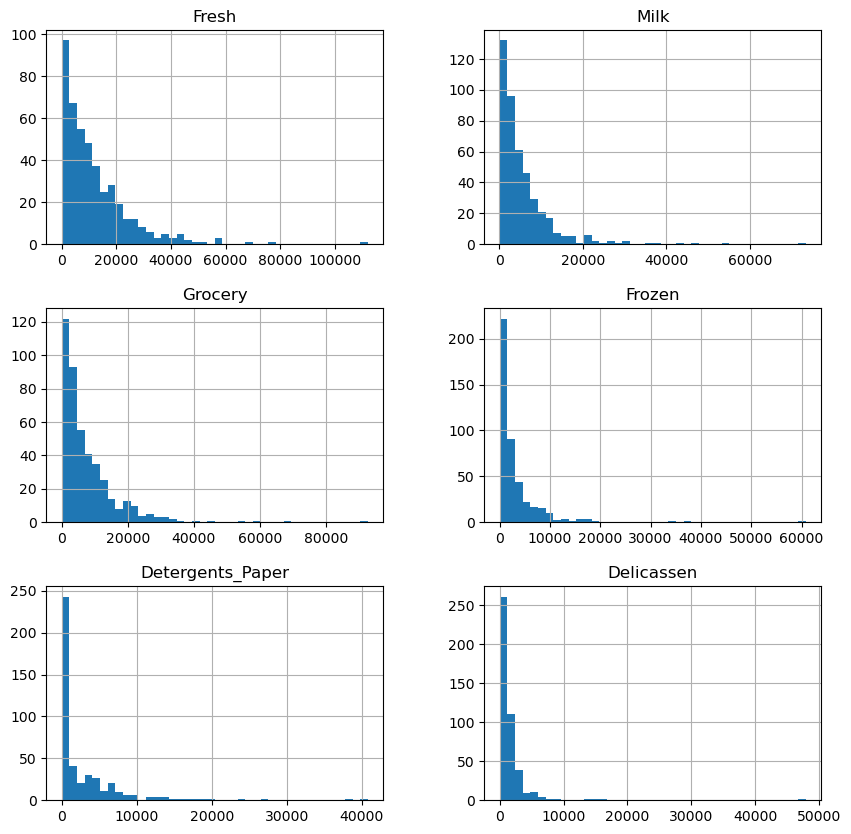

In [8]:
# To visualize only non-categorical columns:
df_continuous = df.iloc[:,2:]

# Plot distribution of the variables 
g = df_continuous.hist(figsize = (10,10), bins=40)

The data is clearly skewed and will need to be normalized.

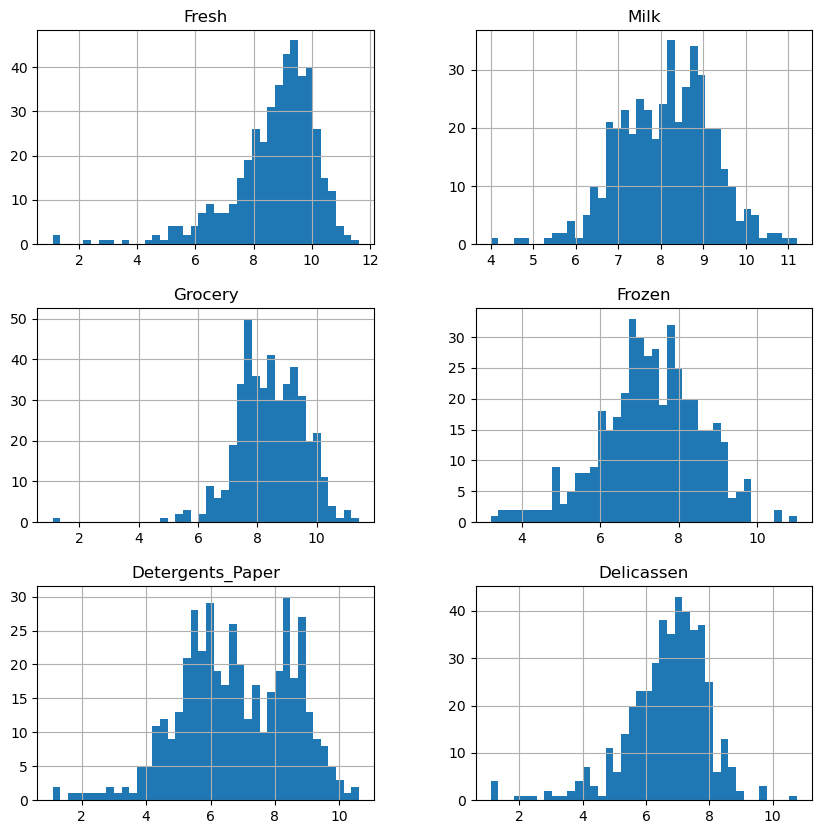

In [9]:
# Apply natural logarithm transformation to normalize distribution
df_normalized = df_continuous.apply(lambda x: np.log(x))

# Plot distribution of the variables 
g = df_normalized.hist(figsize = (10,10), bins=40)

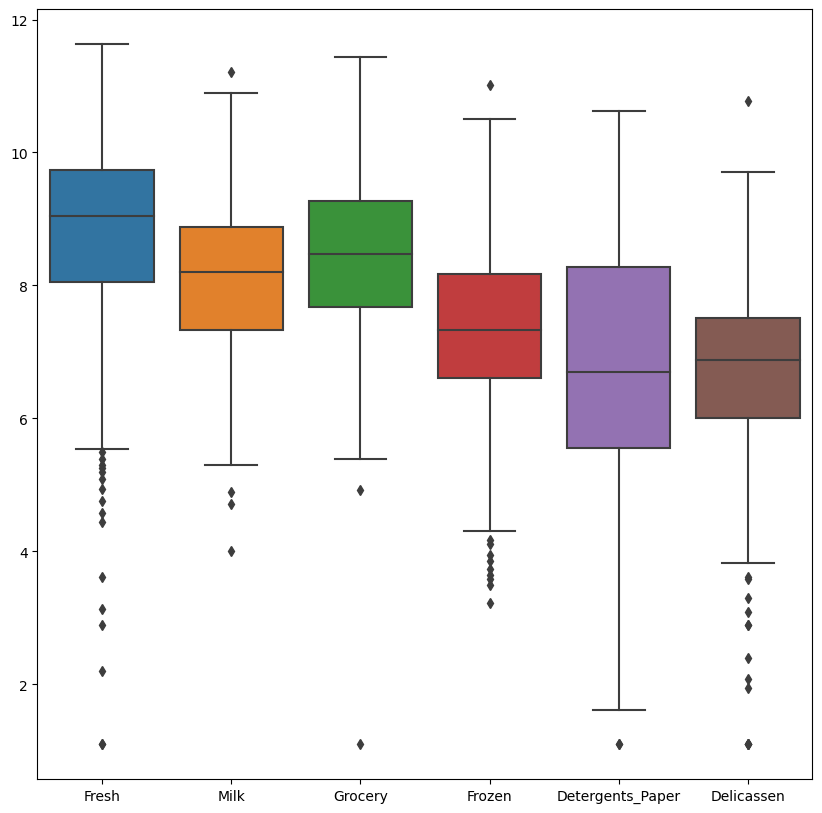

In [10]:
# To check for presence of outliers: 
plt.figure(figsize=(10, 10))
g = sns.boxplot(data=df_normalized)

High presence of outliers will be handled with RobustScaler

In [11]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Create the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
df_scaled_robust = pd.DataFrame(robust_scaler.fit_transform(df_normalized), columns=df_continuous.columns)



In [12]:
# Create the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the data with MinMaxScaler
df_scaled_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_scaled_robust), columns=df_continuous.columns)

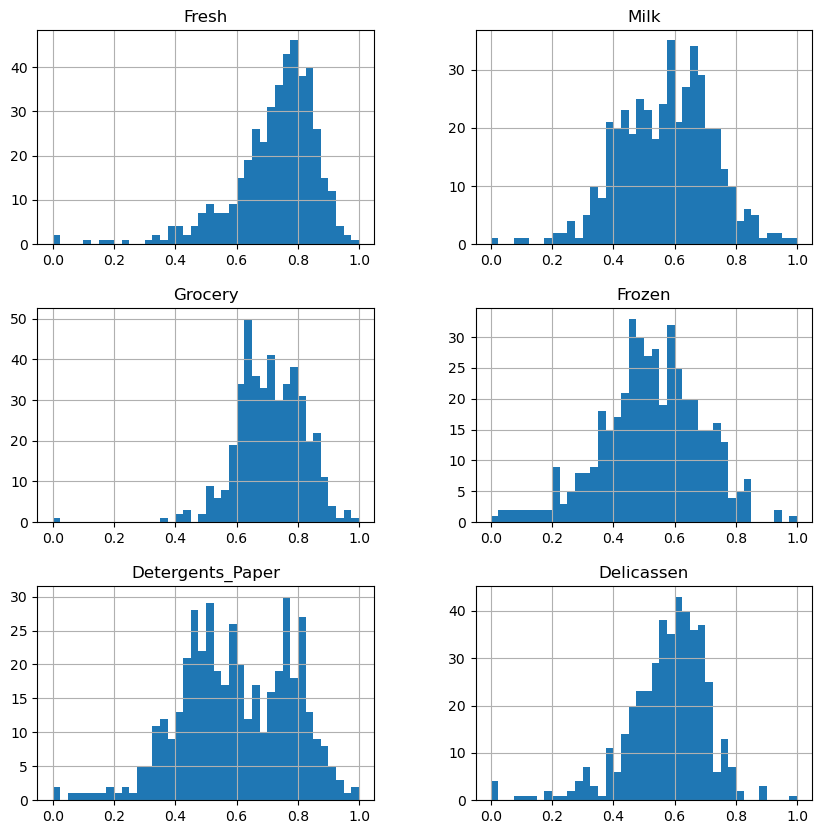

In [13]:
# Distribution after transformation
g = df_scaled_minmax.hist(figsize = (10,10), bins=40)

In [14]:
# To determine correlation between variables in the dataset
corr_mat = df_scaled_minmax.corr()
corr_mat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicassen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


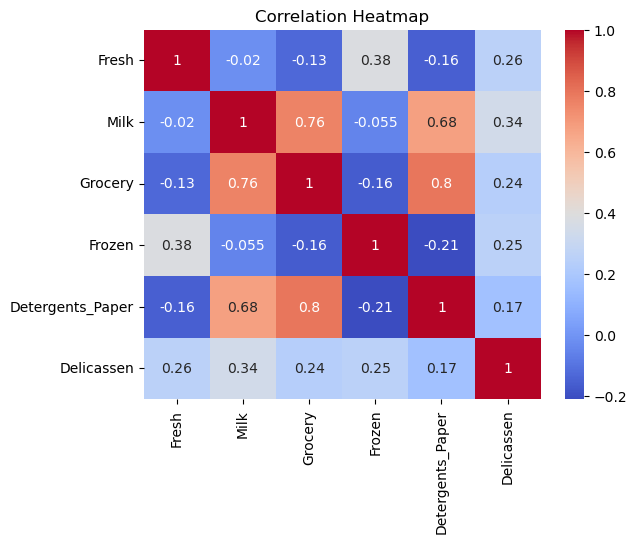

In [15]:
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [16]:
# import Kmeans 
from sklearn.cluster import KMeans

In [17]:
X = df_scaled_minmax.drop(columns='Grocery', axis=1)
X.sample(7)

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
88,0.747597,0.317871,0.764928,0.421005,0.282052
353,0.347950,0.657884,0.283481,0.837359,0.611045
292,0.650798,0.559527,0.645561,0.590091,0.606190
361,0.699394,0.333607,0.497100,0.417114,0.506787
411,0.623363,0.568378,0.528035,0.458158,0.752417
297,0.750288,0.564524,0.521171,0.748093,0.534773
358,0.525539,0.809569,0.705276,0.544784,0.745946


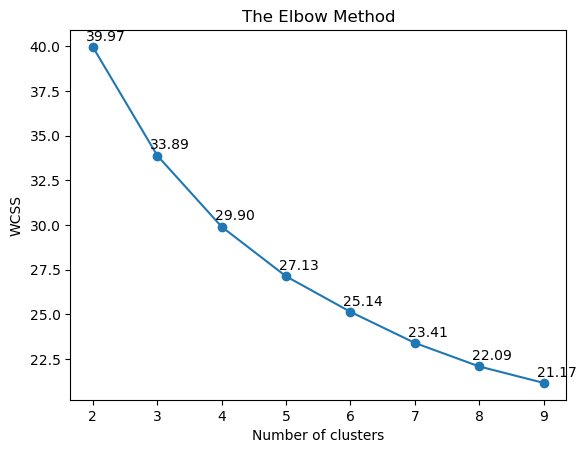

In [18]:
# To find optimal K value using Elbow method: 

wcss = []           # within-cluster sum of squares
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, random_state = 306)
    kmeans.fit(df_scaled_minmax)
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
 
plt.plot(range(2, 10), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Add values of data points 
shift_amount = 0.2          # Adjust this value to control the amount of shift to be able to read off values clearly
for i, j in zip(range(2, 10), wcss):
    plt.text(i + shift_amount, j + shift_amount, f'{j:.2f}', ha='center', va='bottom')

plt.show()

So from the plot above we can use 4 clusters in the model.

In [19]:
# Train the model and predict
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=306)

y_kmeans = kmeans.fit_predict(df_scaled_minmax)

In [20]:
kmeans.inertia_

27.132863681498495

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=500, n_init=100, random_state=306)

y_kmeans = kmeans.fit_predict(df_scaled_minmax)

In [24]:
kmeans.inertia_

27.122152629096448

In [25]:
# Create a new DataFrame to hold the clusters
df_clusters = df_scaled_minmax.copy()

#Add a new column for cluster labels
df_clusters['Cluster'] = y_kmeans

df_clusters.sample(7)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
237,0.829827,0.589825,0.511306,0.669731,0.234658,0.620290,1
17,0.719919,0.655491,0.665917,0.450566,0.505846,0.755058,3
252,0.731285,0.489185,0.712343,0.734571,0.443810,0.654566,1
33,0.873898,0.620494,0.754453,0.705611,0.503259,0.608408,1
76,0.520132,0.580428,0.743358,0.731991,0.543403,0.588594,1
149,0.880330,0.452950,0.610339,0.444462,0.381235,0.637843,3
259,0.929177,0.625427,0.754585,0.614482,0.606776,0.579415,1


In [26]:
# Group by the 'Cluster' column and display the mean
df_clusters.groupby('Cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,0.538457,0.663412,0.810453,0.302790,0.777809,0.487206
1,0.805543,0.538017,0.672835,0.694009,0.520323,0.618327
2,0.750023,0.714432,0.809879,0.538843,0.778422,0.651460
3,0.726466,0.534895,0.667937,0.428037,0.528164,0.557556
4,0.704953,0.354004,0.576322,0.538054,0.362814,0.471894


In [27]:
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print(cluster_counts)

1    116
2    107
3     97
4     61
0     59
dtype: int64


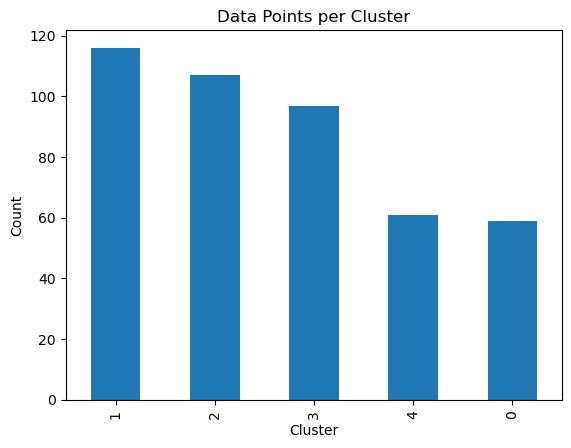

In [28]:
cluster_counts.plot.bar()
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Data Points per Cluster')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
df_clusters = df_scaled_minmax.copy()

# Instantiate the AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Fit the hierarchical clustering model to your data
df_clusters['Cluster'] = agg_clustering.fit_predict(df_clusters)

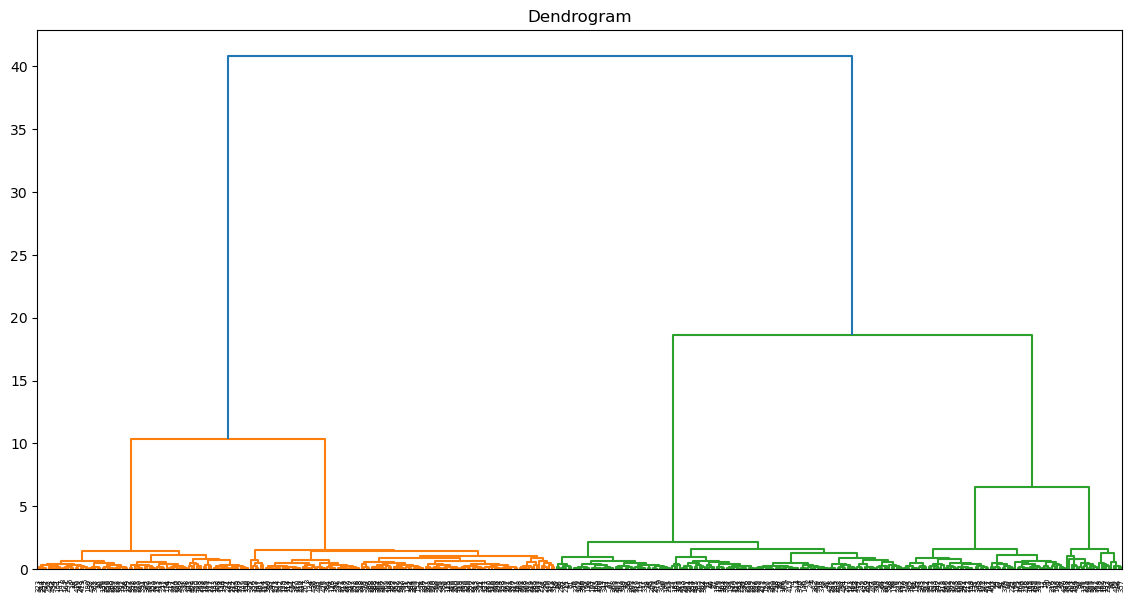

In [32]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(14, 7))  
plt.title('Dendrogram')  
dend = shc.dendrogram(shc.linkage(df_clusters, method='ward'))

From the plot, it seems 5 clusters is also good here.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [33]:
from sklearn.decomposition import PCA

In [37]:
# Create PCA instance: model
model = PCA(n_components=4)

df_clusters = df_scaled_minmax.copy()

# Apply the fit_transform method of model to df_clusters
pca_features = model.fit_transform(df_clusters)

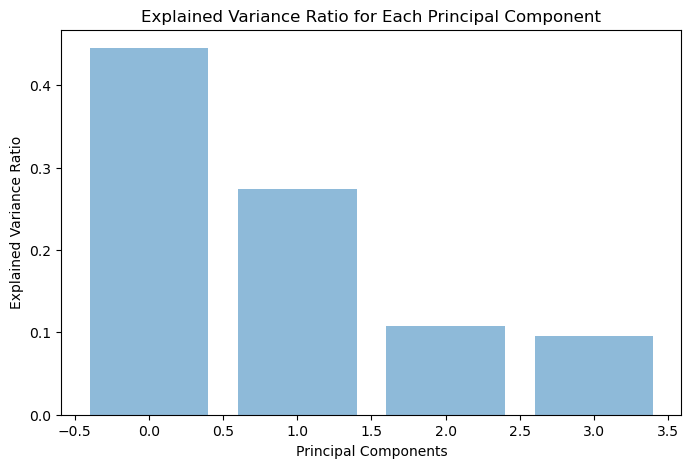

In [38]:
# Get the explained variance
explained_variance = model.explained_variance_ratio_

# Let's plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

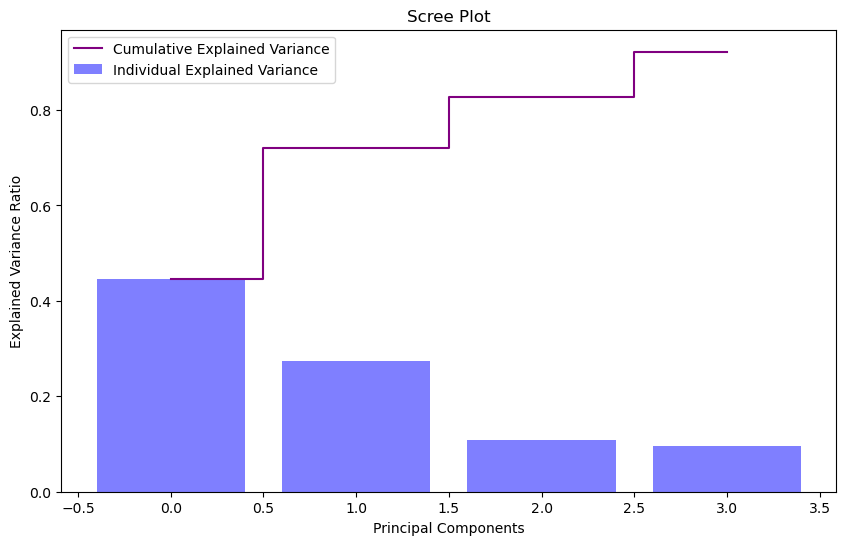

In [39]:
# Calculate the cumulative sum of the explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Create the Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance', color='blue')
plt.step(range(len(cumulative_explained_variance)), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance', color='purple')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.title('Scree Plot')
plt.show()

This shows that the first 3 principal components can explain over 80% of the variance.

In [40]:
# Get the feature names from the original DataFrame
feature_names = df_clusters.columns

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(model.components_, columns=feature_names)

# Calculate the absolute average loading for each feature across components
loadings_df['Avg_Absolute_Loading'] = loadings_df.abs().mean(axis=1)

# Sort the features based on the average absolute loading in descending order
sorted_features = loadings_df.sort_values('Avg_Absolute_Loading', ascending=False)

# Print the sorted features and their average absolute loadings
print(sorted_features[['Avg_Absolute_Loading']])

   Avg_Absolute_Loading
0              0.349930
1              0.322303
2              0.314949
3              0.292202


In this case, Feature 0 has the highest average absolute loading, indicating that it contributes the most to the principal components.  
Feature 3 has the lowest average absolute loading among the 4 features.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- K-means clustering worked best with 5 clusters and is useful for visualizing feature importance.
- Dendograms from the hierarchical clustering model provided a good visualization of the clusters.
- However, the PCA shows 3 components best explain the variance in the dataset.
- So future goals with this dataset would involve using a different method to handle outliers and gather more information about the dataset to see if feature engineering can be carried out on the variables.